# Testing add_row_header Function

This notebook tests the `add_row_header` function with various figure shapes and configurations to ensure proper automatic spacing.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from common.plotting import add_row_header

# Generate some sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) * np.cos(x)

# Create 2D data for heatmaps
X, Y = np.meshgrid(np.linspace(0, 5, 50), np.linspace(0, 5, 50))
Z1 = np.sin(X) * np.cos(Y)
Z2 = np.exp(-((X - 2.5) ** 2) - (Y - 2.5) ** 2)
Z3 = X**2 + Y**2

plt.style.use("cd_bl_slides")

## Test 1: Single Row with Multiple Columns

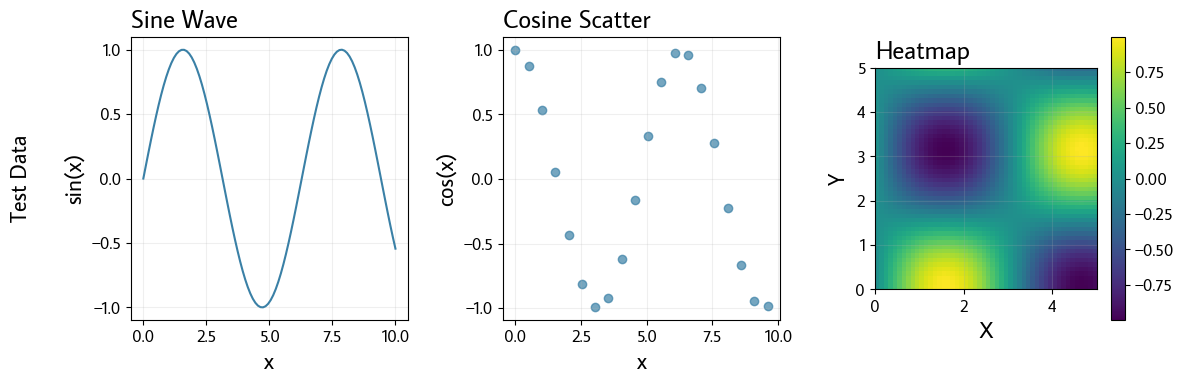

In [2]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot different types of data
axes[0].plot(x, y1)
axes[0].set_title("Sine Wave")
axes[0].set_xlabel("x")
axes[0].set_ylabel("sin(x)")

axes[1].scatter(x[::5], y2[::5], alpha=0.7)
axes[1].set_title("Cosine Scatter")
axes[1].set_xlabel("x")
axes[1].set_ylabel("cos(x)")

im = axes[2].imshow(Z1, extent=[0, 5, 0, 5], origin="lower")
axes[2].set_title("Heatmap")
axes[2].set_xlabel("X")
axes[2].set_ylabel("Y")
plt.colorbar(im, ax=axes[2])

# Add row header to the first subplot
add_row_header(axes[0], "Test Data")

plt.tight_layout()
plt.show()

## Test 2: Multiple Rows with Single Column

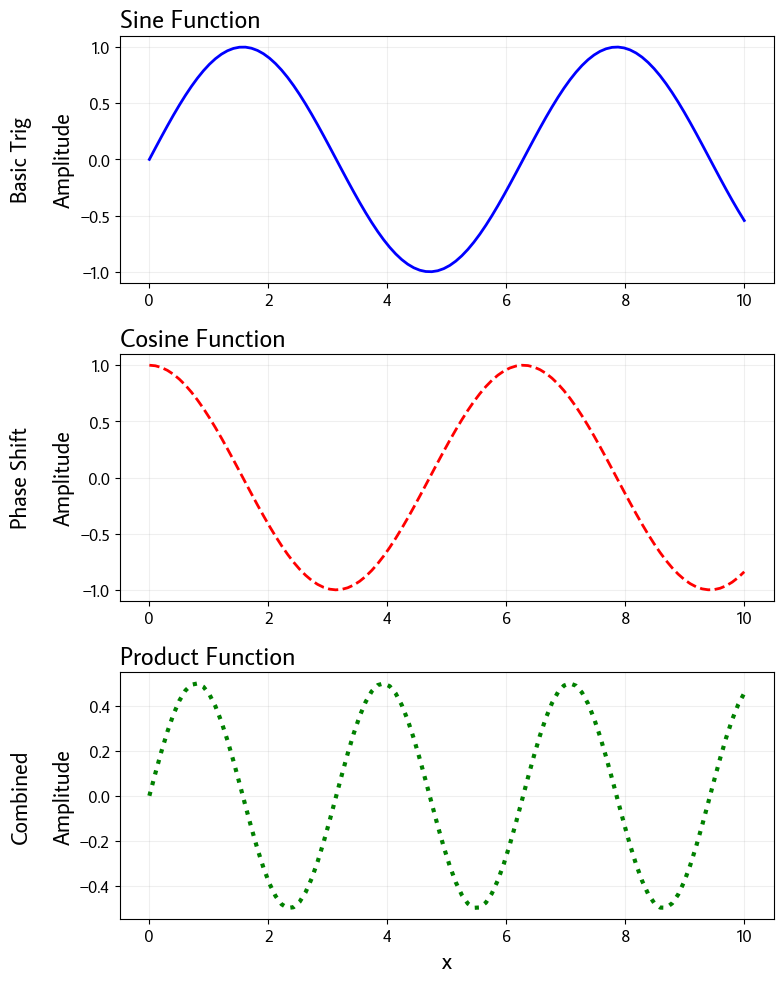

In [3]:
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

# Plot different data in each row
axes[0].plot(x, y1, "b-", linewidth=2)
axes[0].set_title("Sine Function")
axes[0].set_ylabel("Amplitude")
axes[0].grid(True)

axes[1].plot(x, y2, "r--", linewidth=2)
axes[1].set_title("Cosine Function")
axes[1].set_ylabel("Amplitude")
axes[1].grid(True)

axes[2].plot(x, y3, "g:", linewidth=3)
axes[2].set_title("Product Function")
axes[2].set_xlabel("x")
axes[2].set_ylabel("Amplitude")
axes[2].grid(True)

# Add row headers
add_row_header(axes[0], "Basic Trig")
add_row_header(axes[1], "Phase Shift")
add_row_header(axes[2], "Combined")

plt.tight_layout()
plt.show()

## Test 3: Multi-line Row Headers

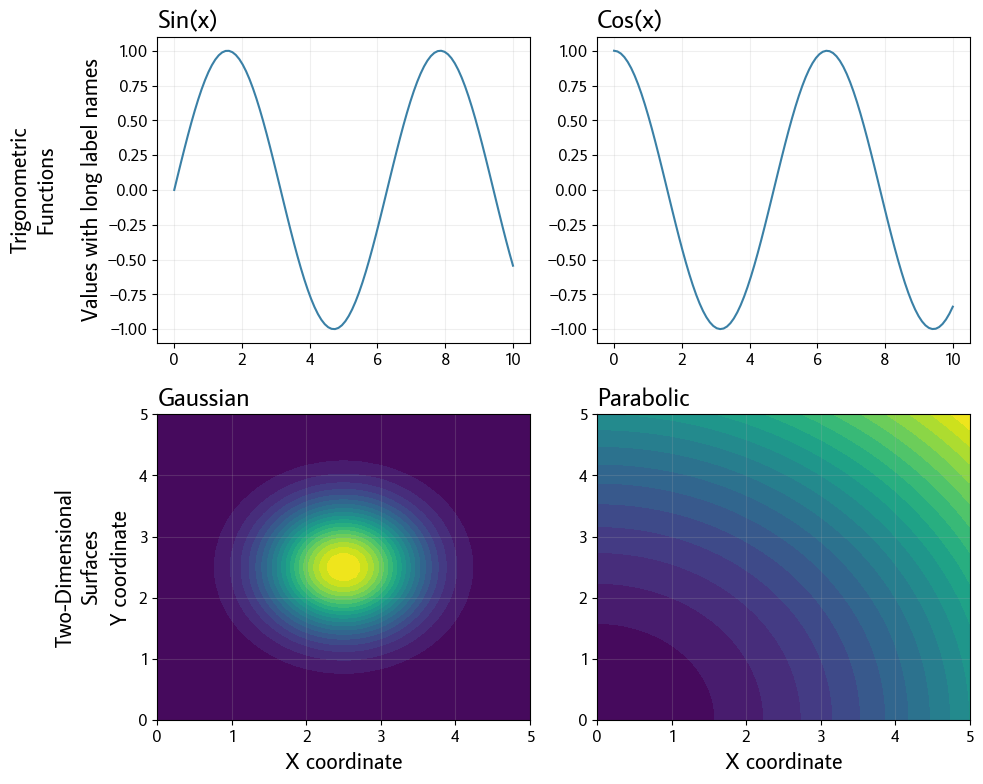

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# First row
axes[0, 0].plot(x, y1)
axes[0, 0].set_title("Sin(x)")
axes[0, 0].set_ylabel("Values with long label names")

axes[0, 1].plot(x, y2)
axes[0, 1].set_title("Cos(x)")

# Second row
axes[1, 0].contourf(X, Y, Z2, levels=20)
axes[1, 0].set_title("Gaussian")
axes[1, 0].set_xlabel("X coordinate")
axes[1, 0].set_ylabel("Y coordinate")

axes[1, 1].contourf(X, Y, Z3, levels=20)
axes[1, 1].set_title("Parabolic")
axes[1, 1].set_xlabel("X coordinate")

# Add multi-line row headers
add_row_header(axes[0, 0], "Trigonometric\nFunctions")
add_row_header(axes[1, 0], "Two-Dimensional\nSurfaces")

plt.tight_layout()
plt.show()

## Test 4: Different Font Sizes and Styles

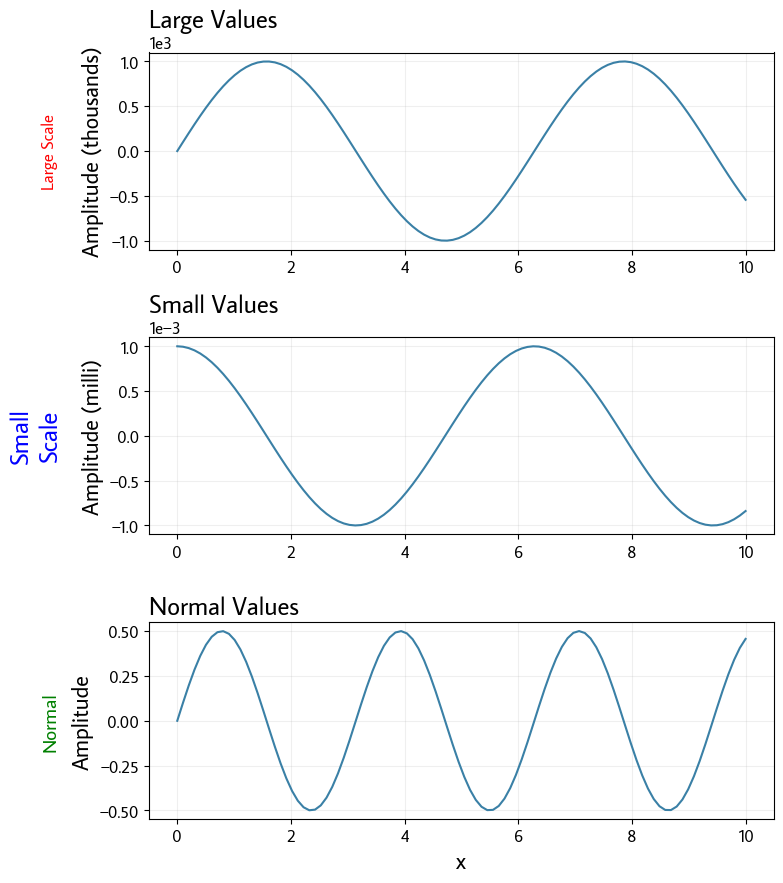

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(8, 9))

# Create plots with different y-axis tick label lengths
axes[0].plot(x, y1 * 1000)
axes[0].set_title("Large Values")
axes[0].set_ylabel("Amplitude (thousands)")
axes[0].ticklabel_format(style="scientific", axis="y", scilimits=(0, 0))

axes[1].plot(x, y2 * 0.001)
axes[1].set_title("Small Values")
axes[1].set_ylabel("Amplitude (milli)")
axes[1].ticklabel_format(style="scientific", axis="y", scilimits=(0, 0))

axes[2].plot(x, y3)
axes[2].set_title("Normal Values")
axes[2].set_xlabel("x")
axes[2].set_ylabel("Amplitude")

# Add row headers with different styles
add_row_header(axes[0], "Large Scale", fontsize=12, color="red")
add_row_header(axes[1], "Small\nScale", fontsize=18, color="blue", fontweight="normal")
add_row_header(axes[2], "Normal", fontsize=14, color="green", style="italic")

plt.tight_layout()
plt.show()

## Test 5: Manual Padding Override

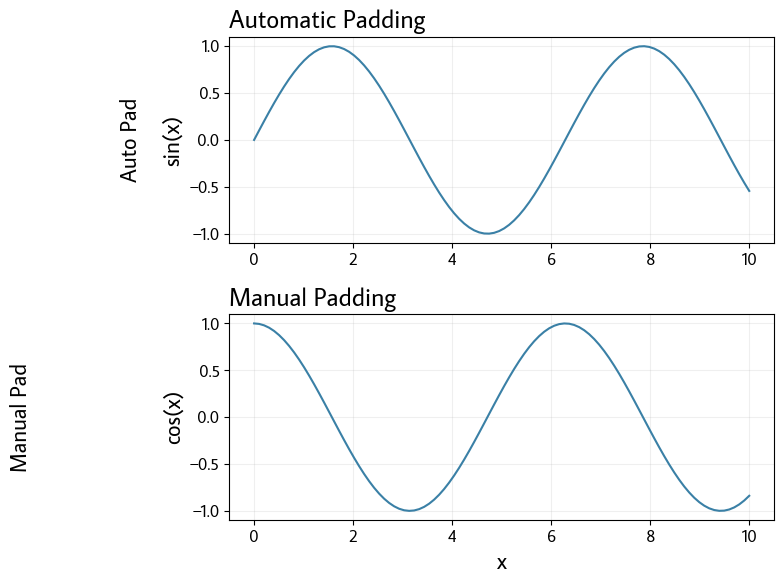

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Same plots but different padding
axes[0].plot(x, y1)
axes[0].set_title("Automatic Padding")
axes[0].set_ylabel("sin(x)")

axes[1].plot(x, y2)
axes[1].set_title("Manual Padding")
axes[1].set_xlabel("x")
axes[1].set_ylabel("cos(x)")

# Compare automatic vs manual padding
add_row_header(axes[0], "Auto Pad")  # Automatic padding
add_row_header(axes[1], "Manual Pad", pad=150)  # Manual padding

plt.tight_layout()
plt.show()

## Test 6: Edge Cases and Complex Layouts

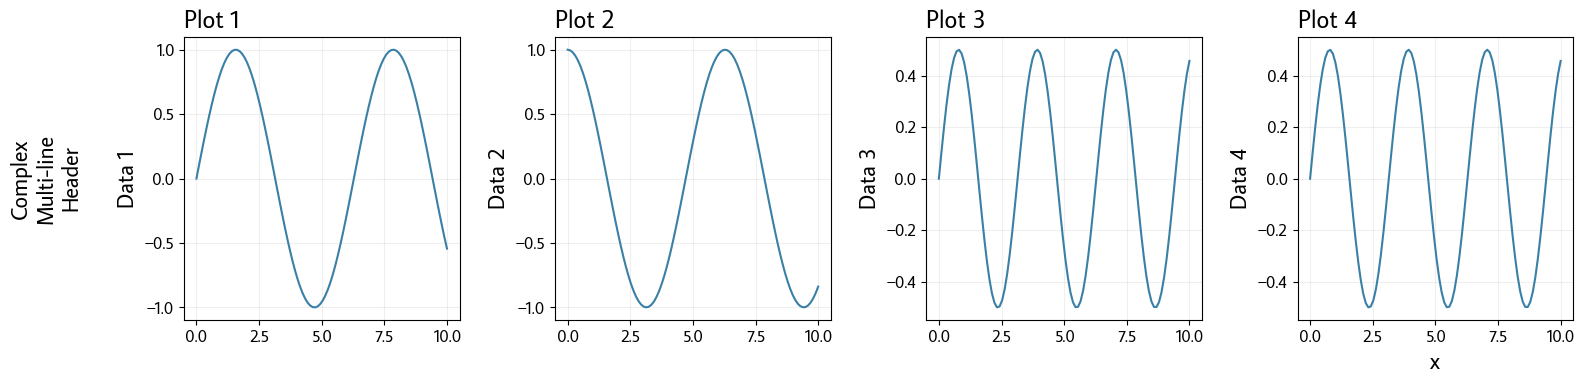

All tests completed! Check the plots above to verify proper row header spacing.


In [7]:
# Test with very wide figure
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, ax in enumerate(axes):
    ax.plot(x, [y1, y2, y3, y1 * y2][i])
    ax.set_title(f"Plot {i+1}")
    ax.set_ylabel(f"Data {i+1}")
    if i == len(axes) - 1:
        ax.set_xlabel("x")

# Add a three-line row header
add_row_header(axes[0], "Complex\nMulti-line\nHeader")

plt.tight_layout()
plt.show()

print("All tests completed! Check the plots above to verify proper row header spacing.")